<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/timeSeriesSplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%config InlineBackend.figure_format = 'retina'

In [ ]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/naenumtou/statisticalModel/main/datasets/Bayesian_model.csv')

# Target and Features split
X = df.drop(['y'], axis = 1)
y = df['y']

In [ ]:
# Time series cross validation
tscv = TimeSeriesSplit(n_splits = 5)
                       
for trainIndex, testIndex in tscv.split(X):
  print(f'Train index: {trainIndex}')
  print(f'Test index: {testIndex}')

Train index: [ 0  1  2  3  4  5  6  7  8  9 10]
Test index: [11 12 13 14 15 16 17 18]
Train index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Test index: [19 20 21 22 23 24 25 26]
Train index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Test index: [27 28 29 30 31 32 33 34]
Train index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
Test index: [35 36 37 38 39 40 41 42]
Train index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Test index: [43 44 45 46 47 48 49 50]


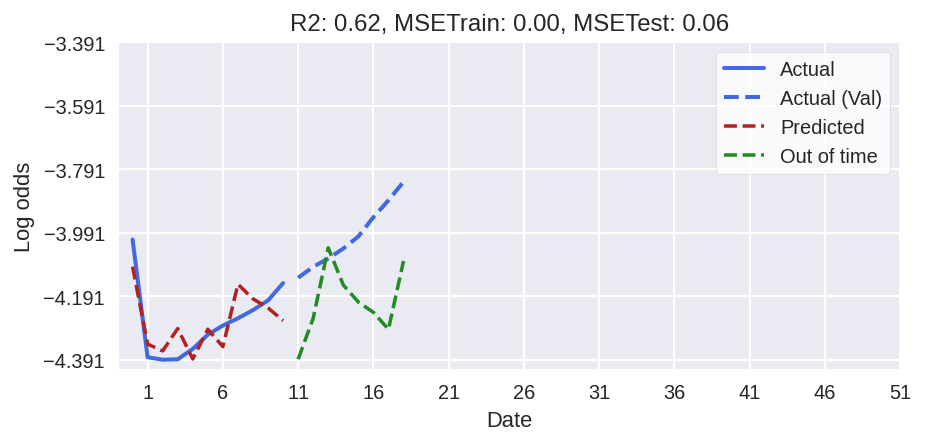

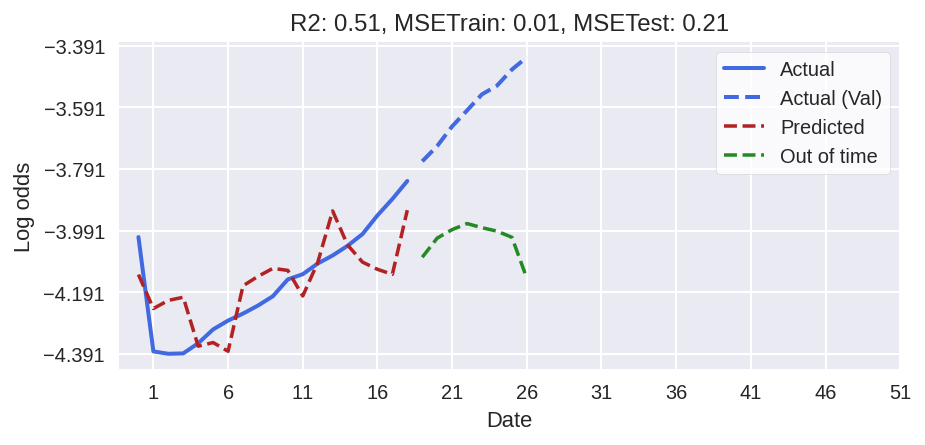

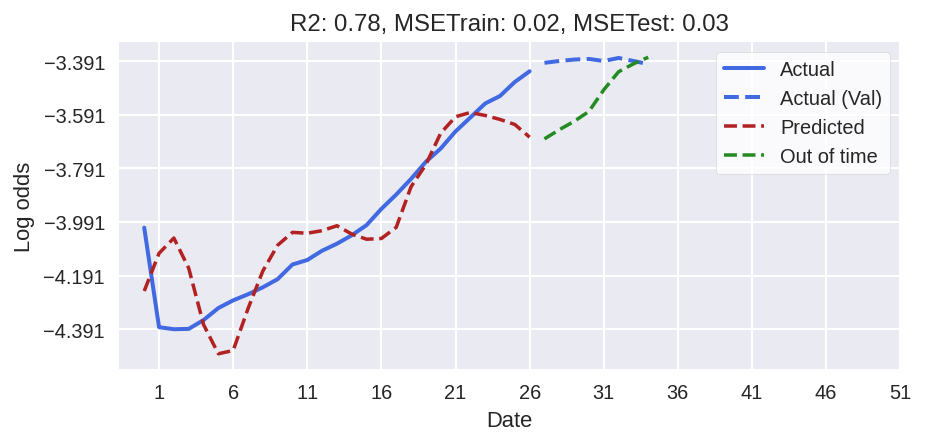

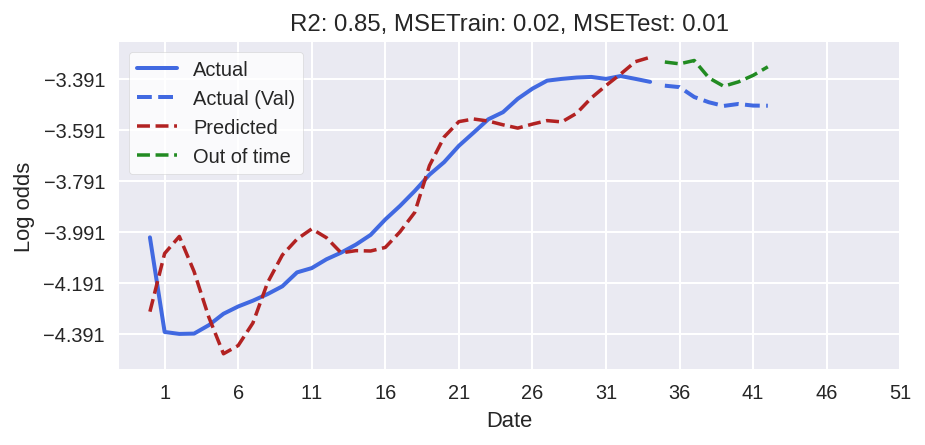

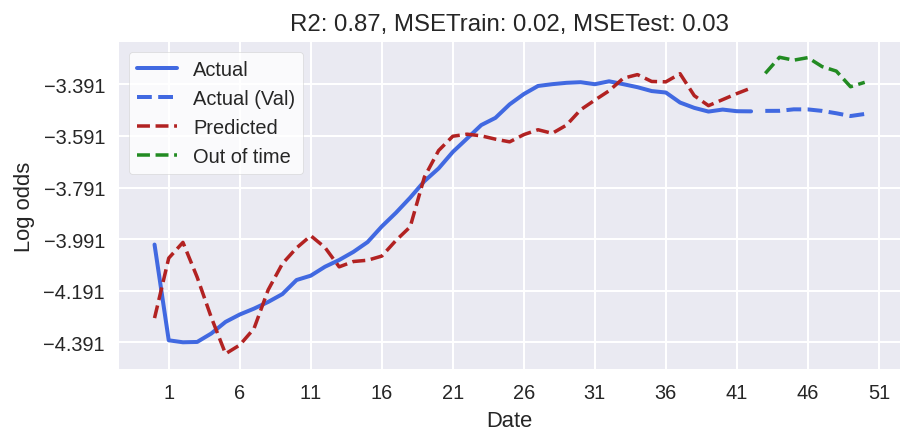

In [ ]:
# Time series cross validation training
tscv = TimeSeriesSplit(n_splits = 5)
model = LinearRegression()
scores = None
                       
for trainIndex, testIndex in tscv.split(X):
  
  # Train/Test split
  XTrain, XTest = X.iloc[trainIndex], X.iloc[testIndex]
  yTrain, yTest = y.iloc[trainIndex], y.iloc[testIndex]

  # Model training
  model.fit(XTrain, yTrain)

  # Model score
  scoreTrain = model.score(XTrain, yTrain)
  mseTrain = mean_squared_error(model.predict(XTrain), yTrain)
  mseTest = mean_squared_error(model.predict(XTest), yTest)

  score = np.column_stack((scoreTrain, mseTrain, mseTest))

  # Model prediction
  predTrain = model.predict(XTrain)
  predTest = model.predict(XTest)

  # Plot
  plt.figure(figsize = (7, 3))
  with plt.style.context('seaborn'):
    plt.title(f'R2: {scoreTrain:.2f}, MSETrain: {mseTrain:.2f}, MSETest: {mseTest:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Log odds')
    plt.plot(yTrain, c = 'royalblue', linewidth = 2, label = 'Actual')
    plt.plot(range(yTrain.shape[0], yTrain.shape[0] + yTest.shape[0]), yTest, c = 'royalblue', linewidth = 2, linestyle = '--', label = 'Actual (Val)')
    plt.plot(predTrain, c = 'firebrick', linestyle = '--', label = 'Predicted')
    plt.plot(range(predTrain.shape[0], predTrain.shape[0] + predTest.shape[0]), predTest, c = 'forestgreen', linestyle = '--', label = 'Out of time')
    plt.xticks(np.arange(1, df.shape[0] + 1, 5))
    plt.yticks(np.arange(df['y'].min(), df['y'].max(), 0.2))
    plt.legend(frameon = True, facecolor = 'white')
    plt.show()

  # Score
  if scores is None:
    scores = score.copy()
  else:
    scores = np.vstack((scores, score))

In [ ]:
# Summary scores
scores = pd.DataFrame(scores, columns = ['R2Train', 'MSETrain', 'MSETest'])
scores.index = scores.index + 1
scores.loc['Average'] = scores.mean()
scores = scores.reset_index().rename(columns = {'index': 'K-Fold'})
scores

,K-Fold,R2Train,MSETrain,MSETest
0,1,0.620677,0.004757,0.058346
1,2,0.514575,0.014148,0.206667
2,3,0.776511,0.020483,0.031592
3,4,0.852074,0.019813,0.012184
4,5,0.867421,0.017402,0.028136
5,Average,0.726251,0.015321,0.067385
